## Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report
)

# Set random seed for reproducibility
np.random.seed(42)

## Understanding the Confusion Matrix

Before diving into metrics, let's understand the confusion matrix:

```
                    Predicted
                Negative  Positive
Actual Negative    TN        FP
       Positive    FN        TP
```

- **TP (True Positives)**: Correctly predicted positive cases
- **TN (True Negatives)**: Correctly predicted negative cases
- **FP (False Positives)**: Incorrectly predicted as positive (Type I Error)
- **FN (False Negatives)**: Incorrectly predicted as negative (Type II Error)

## Create Sample Dataset

In [2]:
# Create a binary classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    weights=[0.7, 0.3],  # Imbalanced dataset
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts())
print(f"\nClass distribution in test set:")
print(pd.Series(y_test).value_counts())

Training set size: 700
Test set size: 300

Class distribution in training set:
0    485
1    215
Name: count, dtype: int64

Class distribution in test set:
0    214
1     86
Name: count, dtype: int64


## Train a Simple Model

In [3]:
# Train a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Model trained successfully!")

Model trained successfully!


## Visualize Confusion Matrix

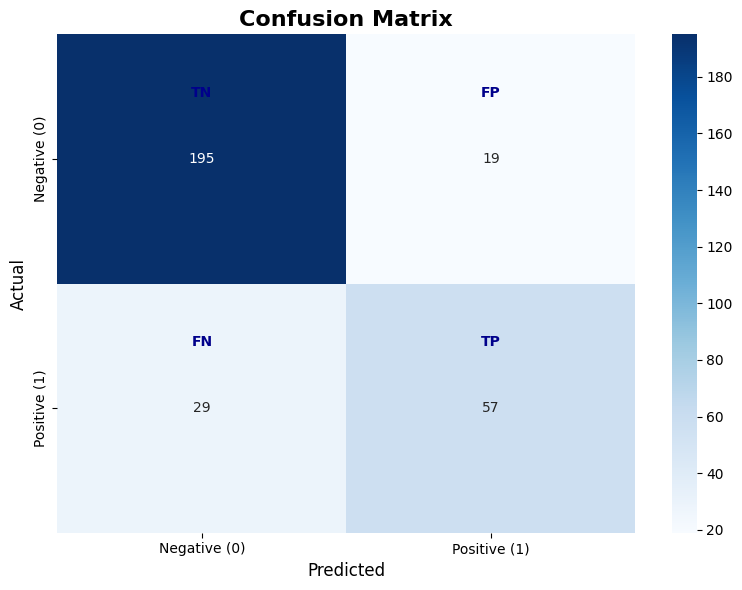


Confusion Matrix Values:
True Negatives (TN): 195
False Positives (FP): 19
False Negatives (FN): 29
True Positives (TP): 57


In [4]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

# Add labels for TN, FP, FN, TP
plt.text(0.5, 0.25, 'TN', fontsize=10, ha='center', color='darkblue', fontweight='bold')
plt.text(1.5, 0.25, 'FP', fontsize=10, ha='center', color='darkblue', fontweight='bold')
plt.text(0.5, 1.25, 'FN', fontsize=10, ha='center', color='darkblue', fontweight='bold')
plt.text(1.5, 1.25, 'TP', fontsize=10, ha='center', color='darkblue', fontweight='bold')

plt.tight_layout()
plt.show()

# Extract values
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Values:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

## Calculate Metrics Manually

Let's calculate each metric step by step to understand the formulas:

### 1. Accuracy
**Formula**: `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

Accuracy measures the overall correctness of predictions.

### 2. Precision
**Formula**: `Precision = TP / (TP + FP)`

Precision answers: "Of all positive predictions, how many were actually positive?"

### 3. Recall (Sensitivity)
**Formula**: `Recall = TP / (TP + FN)`

Recall answers: "Of all actual positives, how many did we correctly identify?"

### 4. F1-Score
**Formula**: `F1 = 2 × (Precision × Recall) / (Precision + Recall)`

F1-Score is the harmonic mean of precision and recall.

## When to Use Which Metric?

### Use **Accuracy** when:
- Classes are balanced
- All errors are equally important
- Example: Predicting coin flips

### Use **Precision** when:
- False Positives are costly
- You want to be sure when you predict positive
- Example: Spam detection (don't want to mark important emails as spam)

### Use **Recall** when:
- False Negatives are costly
- You want to catch all positive cases
- Example: Disease detection (don't want to miss sick patients)

### Use **F1-Score** when:
- You need a balance between Precision and Recall
- Classes are imbalanced
- Both false positives and false negatives matter

In [ ]:
# Manual calculation
accuracy_manual = (tp + tn) / (tp + tn + fp + fn)
precision_manual = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_manual = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual) if (precision_manual + recall_manual) > 0 else 0

print("Manual Calculations:")
print("=" * 50)
print(f"Accuracy  = ({tp} + {tn}) / ({tp} + {tn} + {fp} + {fn}) = {accuracy_manual:.4f}")
print(f"Precision = {tp} / ({tp} + {fp}) = {precision_manual:.4f}")
print(f"Recall    = {tp} / ({tp} + {fn}) = {recall_manual:.4f}")
print(f"F1-Score  = 2 × ({precision_manual:.4f} × {recall_manual:.4f}) / ({precision_manual:.4f} + {recall_manual:.4f}) = {f1_manual:.4f}")

## Using Scikit-Learn Functions

In [ ]:
# Calculate using sklearn functions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nScikit-Learn Calculations:")
print("=" * 50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

## Comprehensive Classification Report

In [ ]:
# Generate classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

## Visualize Metrics Comparison

In [ ]:
# Create bar plot of metrics
metrics_dict = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_dict.keys(), metrics_dict.values(), 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
               alpha=0.8, edgecolor='black')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel('Score', fontsize=12)
plt.title('Classification Metrics Comparison', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## Real-World Example: Medical Diagnosis

Let's simulate a medical diagnosis scenario to understand these metrics better.

In [ ]:
# Simulated medical diagnosis data
# 1 = Disease present, 0 = No disease
y_true_medical = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1])
y_pred_medical = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

# Calculate metrics
cm_medical = confusion_matrix(y_true_medical, y_pred_medical)
tn_m, fp_m, fn_m, tp_m = cm_medical.ravel()

precision_m = precision_score(y_true_medical, y_pred_medical)
recall_m = recall_score(y_true_medical, y_pred_medical)
accuracy_m = accuracy_score(y_true_medical, y_pred_medical)

print("Medical Diagnosis Example:")
print("=" * 60)
print(f"Total Patients: {len(y_true_medical)}")
print(f"Actually Sick: {sum(y_true_medical)}")
print(f"Actually Healthy: {len(y_true_medical) - sum(y_true_medical)}")
print("\nConfusion Matrix:")
print(f"  True Negatives (Correctly identified healthy): {tn_m}")
print(f"  False Positives (Healthy wrongly diagnosed as sick): {fp_m}")
print(f"  False Negatives (Sick wrongly diagnosed as healthy): {fn_m} ⚠️ DANGEROUS!")
print(f"  True Positives (Correctly identified sick): {tp_m}")
print("\nMetrics:")
print(f"  Accuracy:  {accuracy_m:.2%} - Overall correctness")
print(f"  Precision: {precision_m:.2%} - Of those diagnosed as sick, how many actually were?")
print(f"  Recall:    {recall_m:.2%} - Of all sick patients, how many did we catch?")
print("\n💡 In medical diagnosis, HIGH RECALL is crucial to avoid missing sick patients!")

## Precision-Recall Tradeoff

There's often a tradeoff between precision and recall. Let's visualize this by adjusting the classification threshold.

In [ ]:
# Get prediction probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Test different thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
precisions = []
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_threshold))
    recalls.append(recall_score(y_test, y_pred_threshold))
    accuracies.append(accuracy_score(y_test, y_pred_threshold))

# Plot the tradeoff
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precisions, 'o-', label='Precision', linewidth=2, markersize=6)
plt.plot(thresholds, recalls, 's-', label='Recall', linewidth=2, markersize=6)
plt.plot(thresholds, accuracies, '^-', label='Accuracy', linewidth=2, markersize=6)

plt.xlabel('Classification Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision-Recall Tradeoff', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("\n📊 Observation:")
print("As threshold increases:")
print("  - Precision generally INCREASES (fewer false positives)")
print("  - Recall generally DECREASES (more false negatives)")

## Summary

### Key Takeaways:

1. **Accuracy** = (TP + TN) / Total
   - Good for balanced datasets
   - Can be misleading with imbalanced data

2. **Precision** = TP / (TP + FP)
   - Focus on minimizing false positives
   - "When I predict positive, how often am I right?"

3. **Recall** = TP / (TP + FN)
   - Focus on minimizing false negatives
   - "Of all actual positives, how many did I find?"

4. **F1-Score** = Harmonic mean of Precision and Recall
   - Balanced metric for imbalanced datasets
   - Useful when you need both precision and recall

### Decision Guide:

| Scenario | Metric to Prioritize | Reason |
|----------|---------------------|--------|
| Email spam detection | Precision | Don't want important emails marked as spam |
| Cancer diagnosis | Recall | Don't want to miss any cancer cases |
| Fraud detection | F1-Score | Balance between catching fraud and false alarms |
| Quality control | Precision | Don't want to reject good products |
| Search engines | Recall | Want to retrieve all relevant documents |